# Importing the Libraries

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Reading Ratinopathy Data

In [5]:
df=pd.read_excel("cleaned_pronostico_dataset.xlsx")

In [6]:
df.head()

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy


In [4]:
df.columns

Index(['ID', 'age', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'prognosis'], dtype='object')

In [5]:
df.shape

(6000, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6000 non-null   int64  
 1   age           6000 non-null   float64
 2   systolic_bp   6000 non-null   float64
 3   diastolic_bp  6000 non-null   float64
 4   cholesterol   6000 non-null   float64
 5   prognosis     6000 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 281.4+ KB


In [7]:
df.age=df.age.astype(int)

In [8]:
df.head()

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77,85.288742,80.021878,79.957109,retinopathy
1,1,63,99.379736,84.852361,110.382411,retinopathy
2,2,69,111.349455,109.850616,100.828246,retinopathy
3,3,82,95.056128,79.666851,87.066303,retinopathy
4,4,78,109.154591,90.713220,92.511770,retinopathy


# Checking for null Values

In [9]:
df.isnull().sum()

ID              0
age             0
systolic_bp     0
diastolic_bp    0
cholesterol     0
prognosis       0
dtype: int64

# Checking for duplicate values

In [10]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis


In [11]:
df=df.drop('ID',axis=1)
df.head()

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77,85.288742,80.021878,79.957109,retinopathy
1,63,99.379736,84.852361,110.382411,retinopathy
2,69,111.349455,109.850616,100.828246,retinopathy
3,82,95.056128,79.666851,87.066303,retinopathy
4,78,109.154591,90.713220,92.511770,retinopathy


In [12]:
df['prognosis'].value_counts()

retinopathy       3087
no_retinopathy    2913
Name: prognosis, dtype: int64

# Checking  Depedent Variable is symmetric or not?

C:\Users\parth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prognosis', ylabel='count'>

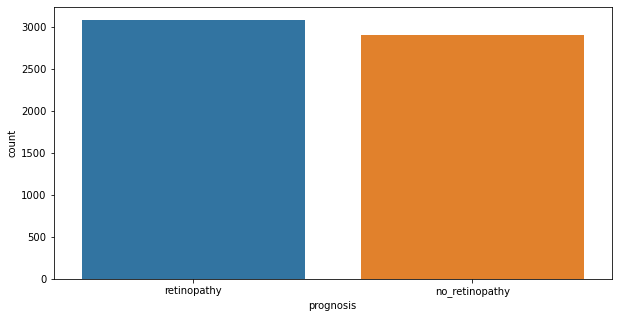

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(df['prognosis'])

Conclusion: As per the graph no of Zeros(no retinopathy) and no of ones(ratinopathy) value counts are almost equal.so we can
    consider this as symmetrically distributed data for building models.

# Checking How Features are Distributed from its Mean value by Box Plot

{'whiskers': [<matplotlib.lines.Line2D at 0x1d5d82e7f40>,
 'caps': [<matplotlib.lines.Line2D at 0x1d5d830a5e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d5d82e7af0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d5d830ad00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d5d82de0d0>],
 'means': []}

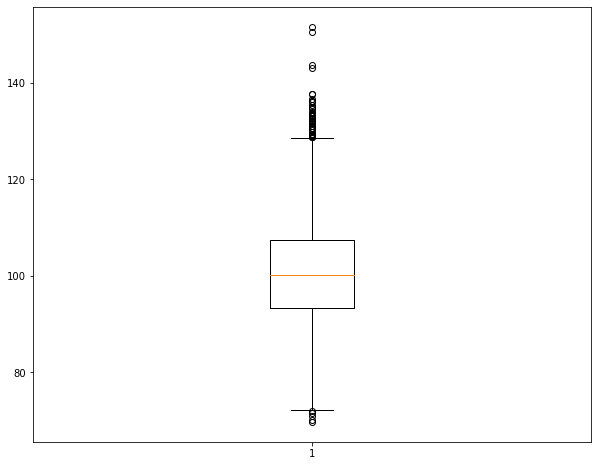

In [14]:
plt.figure(figsize=(10,8))
plt.boxplot(df.systolic_bp)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d5d7ff33a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d5d7ff3ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d5d7fdcfd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d5d8008220>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d5d80085b0>],
 'means': []}

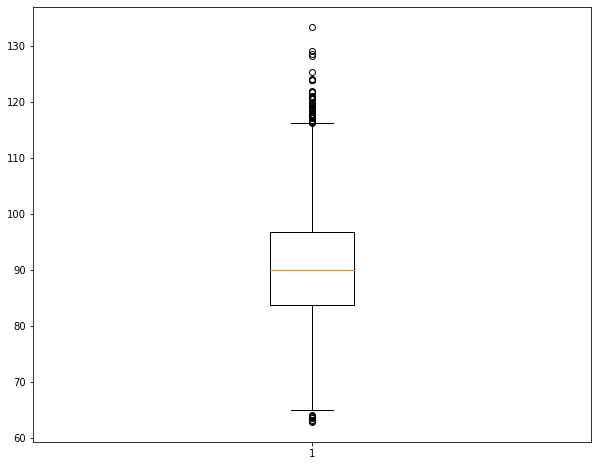

In [15]:
plt.figure(figsize=(10,8))
plt.boxplot(df.diastolic_bp)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d5d81b2340>,
 'caps': [<matplotlib.lines.Line2D at 0x1d5d81b2a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d5d819bf70>],
 'medians': [<matplotlib.lines.Line2D at 0x1d5d81ca1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d5d81ca550>],
 'means': []}

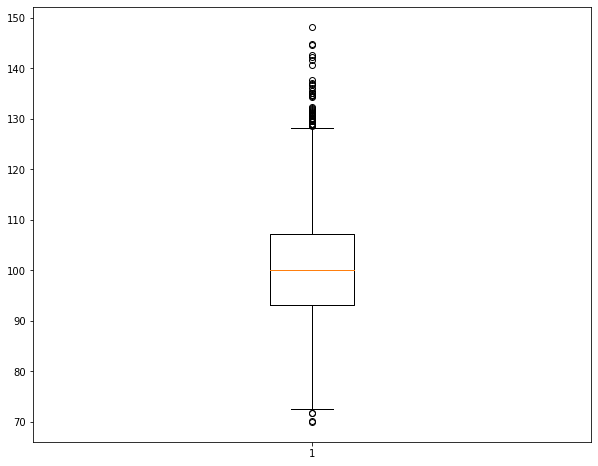

In [16]:
plt.figure(figsize=(10,8))
plt.boxplot(df.cholesterol)

In [17]:
df.skew(axis=0,skipna=True)

C:\Users\parth\AppData\Local\Temp/ipykernel_2512/4266299306.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis=0,skipna=True)


age             0.441397
systolic_bp     0.334655
diastolic_bp    0.336555
cholesterol     0.361514
dtype: float64

# How independent features are related to each other?

In [18]:
df.corr()

,age,systolic_bp,diastolic_bp,cholesterol
age,1.000000,0.010493,-0.004957,-0.007063
systolic_bp,0.010493,1.000000,0.405406,0.406029
diastolic_bp,-0.004957,0.405406,1.000000,0.398345
cholesterol,-0.007063,0.406029,0.398345,1.000000


[]

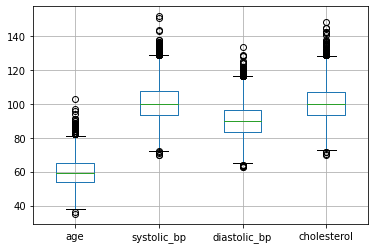

In [19]:
df.boxplot(return_type='dict')
plt.plot()

### From the above plot we can see the outliers in our independent variables, But when deep dived looking at the plot we can clearly see that the systolic_bp level are above 120 which is not normal when considered in an average normal healthy person i.e people having systolic_bp more than 120 are 97% going to have retinopathy according to the dataset, Similarly the normal cholesterol levels are below 130 for an adult above 20 years, above which people will be 99% having illness such as heart conditions/retinopathy, therefore coming to the conclusion when compared with all the variables the data which is being showed as an outlier will not be affecting our model building as they are important values.

##### Ref Link - https://www.webmd.com/hypertension-high-blood-pressure/guide/diastolic-and-systolic-blood-pressure-know-your-numbers

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

In [21]:
%matplotlib inline
rcParams['figure.figsize'] = 15, 10
sb.set_style('whitegrid')

<AxesSubplot:xlabel='prognosis', ylabel='cholesterol'>

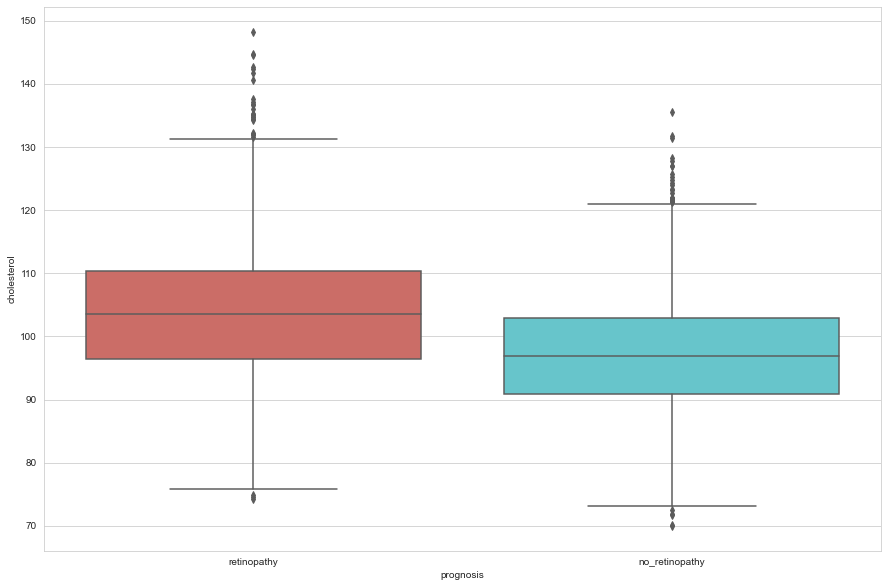

In [22]:
sb.boxplot(x='prognosis', y='cholesterol', data=df, palette='hls')

### As explained previously in the Box-Plot comparison, the people having cholesterol level above 130 are going to have retinopathy such that we can conclude that removing the outliers is not required as it will not create any bias in our analysis/results 

##### Ref Link - https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean

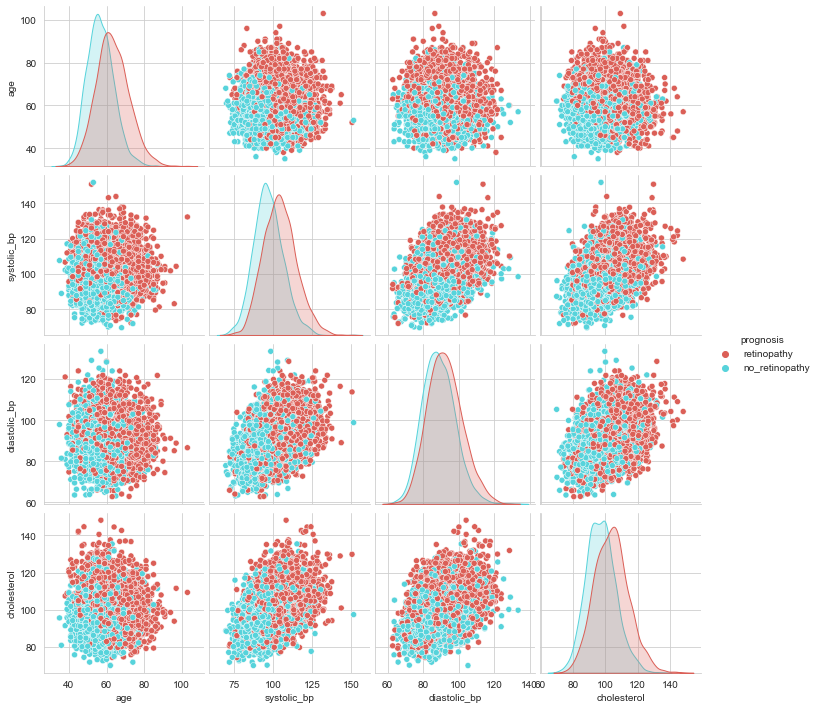

In [23]:
sb.pairplot(df, hue='prognosis', palette='hls')

#### From The above pair-plots we can see that our dataset needs transformation, to normalise the dataset 

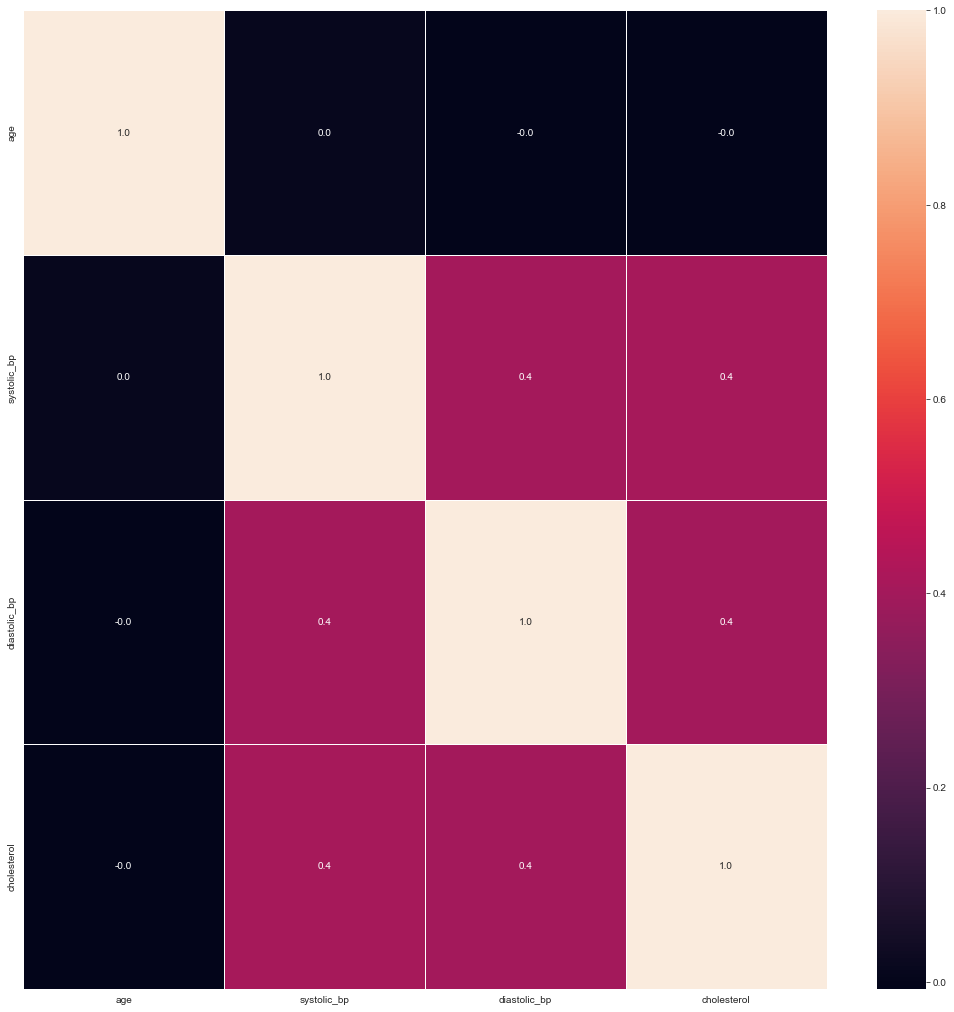

In [24]:
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

#### This heatmap shows the correlation between the features

Text(0, 0.5, 'diastolic_bp')

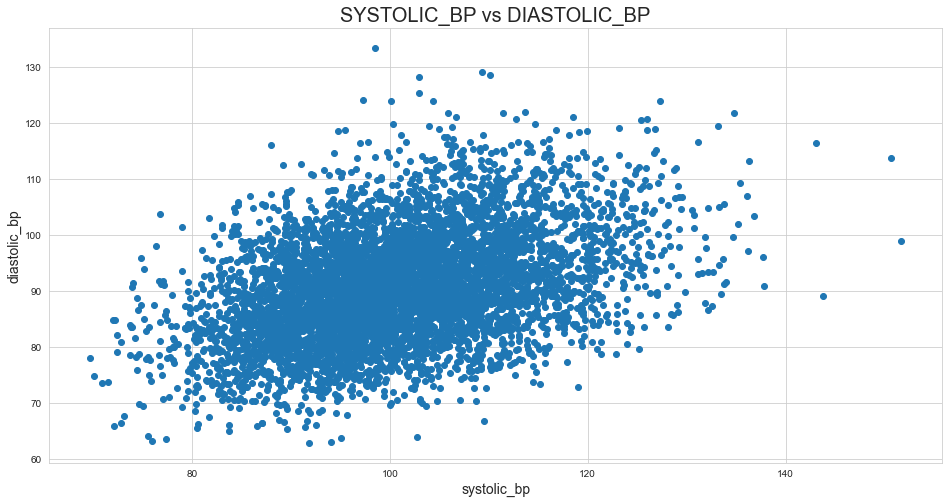

In [25]:
plt.figure(figsize=(16,8))
plt.scatter(df['systolic_bp'],df['diastolic_bp'])
plt.title("SYSTOLIC_BP vs DIASTOLIC_BP",fontsize=20 )
plt.xlabel('systolic_bp',fontsize=14)
plt.ylabel('diastolic_bp',fontsize=14)

Text(0, 0.5, 'cholesterol')

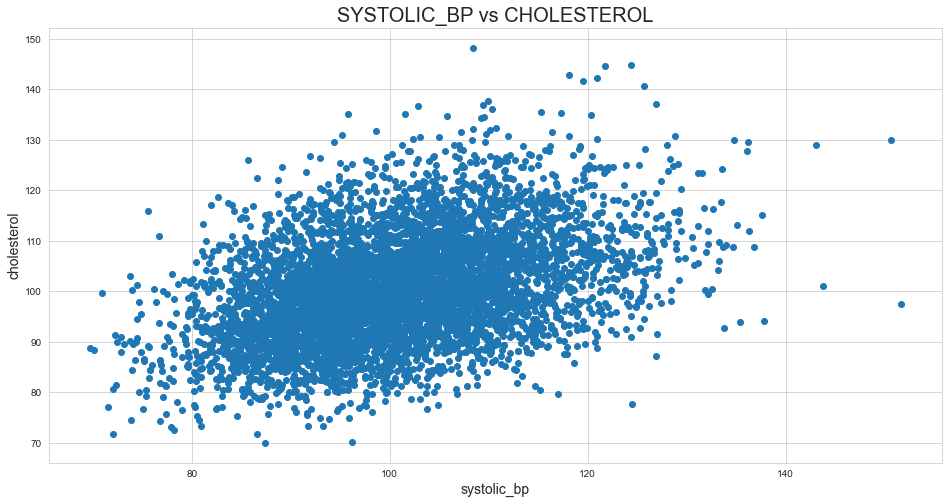

In [26]:
plt.figure(figsize=(16,8))
plt.scatter(df['systolic_bp'],df['cholesterol'])
plt.title("SYSTOLIC_BP vs CHOLESTEROL",fontsize=20 )
plt.xlabel('systolic_bp',fontsize=14)
plt.ylabel('cholesterol',fontsize=14)

Text(0, 0.5, 'cholesterol')

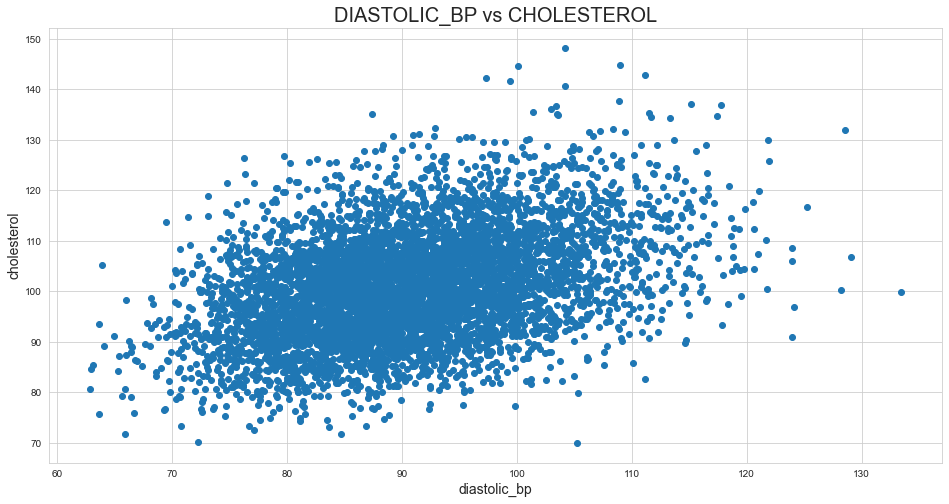

In [27]:
plt.figure(figsize=(16,8))
plt.scatter(df['diastolic_bp'],df['cholesterol'])
plt.title("DIASTOLIC_BP vs CHOLESTEROL",fontsize=20 )
plt.xlabel('diastolic_bp',fontsize=14)
plt.ylabel('cholesterol',fontsize=14)

Conclusion: From the Calculated value of corelation between these features(i.e 0.4) and from above graph we can say there is no clear correlation between them it is close to Randomness

# Converting Catergorical value to numerical value for dependent feature "prognosis"

In [28]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in df.prognosis:
    df.prognosis=label_encoder.fit_transform(df.prognosis)
df.head()

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77,85.288742,80.021878,79.957109,1
1,63,99.379736,84.852361,110.382411,1
2,69,111.349455,109.850616,100.828246,1
3,82,95.056128,79.666851,87.066303,1
4,78,109.154591,90.713220,92.511770,1


In [186]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:,:4])

In [187]:
scaled_df=pd.DataFrame(scaled_df)
scaled_df=scaled_df.rename(columns={0:'Age',1:'Systolic_bp',2:'Diastolic_bp',3:'Cholesterol'})

In [188]:
scaled_df['Prognosis']=df["prognosis"]

In [189]:
scaled_df.head()

,Age,Systolic_bp,Diastolic_bp,Cholesterol,Prognosis
0,1.988753,-1.444088,-1.086684,-1.981315,1
1,0.354305,-0.123270,-0.585981,0.934929,1
2,1.054783,0.998712,2.005212,0.019169,1
3,2.572484,-0.528543,-1.123484,-1.299904,1
4,2.105499,0.792976,0.021526,-0.777959,1


In [190]:
X=scaled_df.iloc[:,0:4]
X

,Age,Systolic_bp,Diastolic_bp,Cholesterol
0,1.988753,-1.444088,-1.086684,-1.981315
1,0.354305,-0.123270,-0.585981,0.934929
2,1.054783,0.998712,2.005212,0.019169
3,2.572484,-0.528543,-1.123484,-1.299904
4,2.105499,0.792976,0.021526,-0.777959
...,...,...,...,...
5995,-1.280142,-0.547148,-0.403205,0.672453
5996,0.354305,-0.061424,0.311964,0.416288
5997,-0.579664,-0.213095,1.263795,1.940727
5998,0.354305,0.573139,-0.253428,0.519882


In [191]:
Y=scaled_df.iloc[:,4]
Y

0       1
1       1
2       1
3       1
4       1
       ..
5995    0
5996    1
5997    1
5998    1
5999    0
Name: Prognosis, Length: 6000, dtype: int64

## Using K-NN Algorithm

In [245]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)
print(pred)

[0 0 1 ... 1 0 0]


### Predictions And Evaluation

In [246]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [247]:
print(confusion_matrix(Y_test,pred))

[[396 198]
 [203 403]]


In [248]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66       594
           1       0.67      0.67      0.67       606

    accuracy                           0.67      1200
   macro avg       0.67      0.67      0.67      1200
weighted avg       0.67      0.67      0.67      1200



### Choosing a K-Value

#### Let's go ahead and use the elbow method to pick a good K Value:

In [249]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,scaled_df,Y,cv=3)
    accuracy_rate.append(score.mean())

In [250]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,scaled_df,Y,cv=3)
    error_rate.append(1-score.mean())

In [251]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

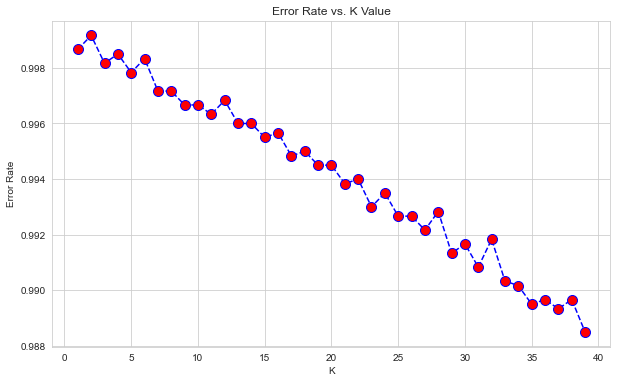

In [252]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### Here we can see that that as the K- Value increases the error rate just tends to drop. Let's retrain the model with that and check the classification report!

In [253]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,Y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(Y_test,pred))
print('\n')
print(classification_report(Y_test,pred))

WITH K=1


[[396 198]
 [203 403]]


              precision    recall  f1-score   support

           0       0.66      0.67      0.66       594
           1       0.67      0.67      0.67       606

    accuracy                           0.67      1200
   macro avg       0.67      0.67      0.67      1200
weighted avg       0.67      0.67      0.67      1200



In [254]:
# NOW WITH K=25
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train,Y_train)
pred = knn.predict(X_test)

print('WITH K=25')
print('\n')
print(confusion_matrix(Y_test,pred))
print('\n')
print(classification_report(Y_test,pred))

WITH K=25


[[425 169]
 [131 475]]


              precision    recall  f1-score   support

           0       0.76      0.72      0.74       594
           1       0.74      0.78      0.76       606

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200



In [258]:
# NOW WITH K=40
knn = KNeighborsClassifier(n_neighbors=40)

knn.fit(X_train,Y_train)
pred = knn.predict(X_test)

print('WITH K=40')
print('\n')
print(confusion_matrix(Y_test,pred))
print('\n')
print(classification_report(Y_test,pred))

WITH K=40


[[429 165]
 [128 478]]


              precision    recall  f1-score   support

           0       0.77      0.72      0.75       594
           1       0.74      0.79      0.77       606

    accuracy                           0.76      1200
   macro avg       0.76      0.76      0.76      1200
weighted avg       0.76      0.76      0.76      1200



## Using ANN Algorithm

In [439]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [440]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [441]:
X_train

array([[ 1.74826902,  1.2414923 ,  1.93054825,  0.49054431],
       [ 0.35574609, -1.50484269, -1.14996714, -0.16209744],
       [-0.92073326,  0.26703089,  0.3045598 , -0.53775426],
       ...,
       [ 0.8199204 ,  1.07443599,  1.18779476, -0.28332962],
       [ 0.93596398,  1.14476906,  1.19122982,  0.73388963],
       [-0.68864611,  1.42384405,  0.08279236, -0.19491034]])

In [442]:
import tensorflow
print(tensorflow.__version__)

2.8.0


In [443]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [444]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10,kernel_initializer='he_uniform',activation='relu',input_dim = 4))

# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [445]:
classifier.summary()

Model: "sequential_171"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_513 (Dense)           (None, 10)                50        
                                                                 
 dense_514 (Dense)           (None, 10)                110       
                                                                 
 dense_515 (Dense)           (None, 1)                 11        
                                                                 
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [446]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, Y_train,validation_split=0.33, batch_size = 500,epochs = 200)

Epoch 1/200
7/7 [==============================] - 1s 30ms/step - loss: 0.8011 - accuracy: 0.5294 - val_loss: 0.7753 - val_accuracy: 0.5224
Epoch 2/200
7/7 [==============================] - 0s 12ms/step - loss: 0.7634 - accuracy: 0.5365 - val_loss: 0.7410 - val_accuracy: 0.5426
Epoch 3/200
7/7 [==============================] - 0s 13ms/step - loss: 0.7313 - accuracy: 0.5549 - val_loss: 0.7112 - val_accuracy: 0.5640
Epoch 4/200
7/7 [==============================] - 0s 12ms/step - loss: 0.7028 - accuracy: 0.5804 - val_loss: 0.6860 - val_accuracy: 0.5880
Epoch 5/200
7/7 [==============================] - 0s 11ms/step - loss: 0.6789 - accuracy: 0.6100 - val_loss: 0.6644 - val_accuracy: 0.6177
Epoch 6/200
7/7 [==============================] - 0s 11ms/step - loss: 0.6587 - accuracy: 0.6299 - val_loss: 0.6457 - val_accuracy: 0.6347
Epoch 7/200
7/7 [==============================] - 0s 11ms/step - loss: 0.6410 - accuracy: 0.6510 - val_loss: 0.6295 - val_accuracy: 0.6555
Epoch 8/200
7/7 [===

In [447]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


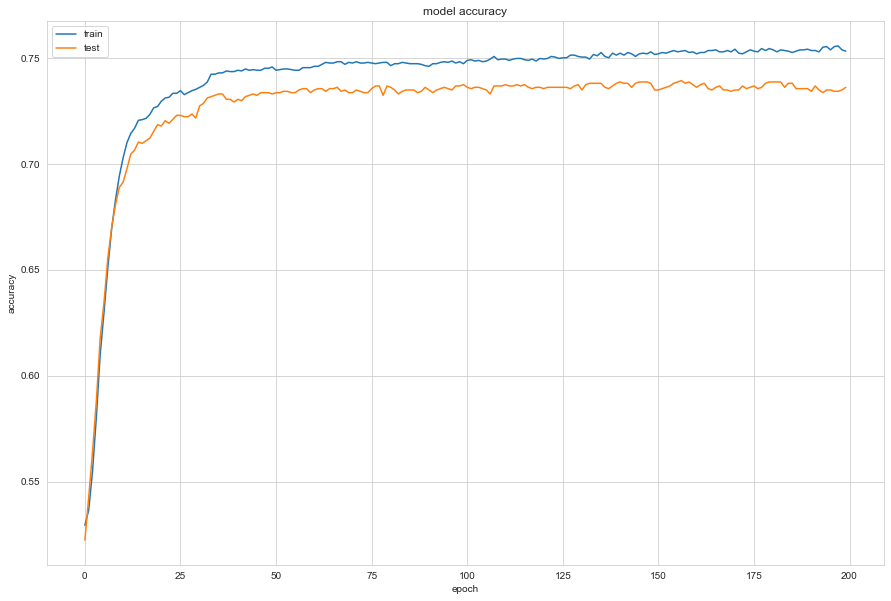

In [448]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

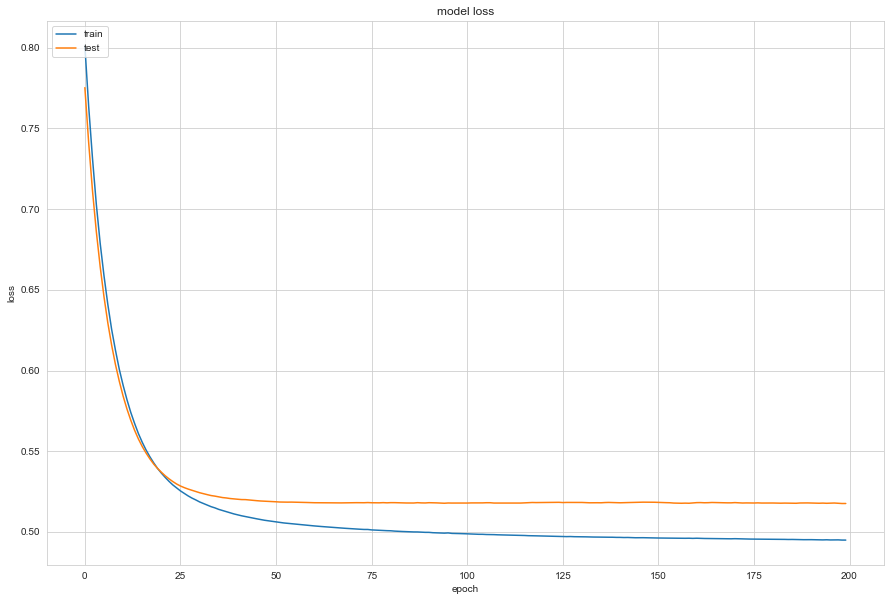

In [449]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [450]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [451]:
y_pred

array([[False],
       [False],
       [ True],
       ...,
       [False],
       [ True],
       [ True]])

In [452]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [453]:
cm

array([[414, 180],
       [117, 489]], dtype=int64)

In [454]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,Y_test)

In [455]:
score

0.7525

In [61]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

#### Tuning of Hyperparameters:- Learning rate and Drop out rate

In [62]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 3,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 3,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(learning_rate = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,Y)

C:\Users\parth\AppData\Local\Temp/ipykernel_2512/1818310682.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.712 total time=  10.2s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.738 total time=   8.8s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.717 total time=   9.4s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.723 total time=  10.4s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.721 total time=   7.6s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [63]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.722000002861023, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.722000002861023,0.00858941154635417 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.6796666741371155,0.08384609971253604 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7193333268165588,0.004696356441760341 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7216666579246521,0.009128724526945365 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.7211666703224182,0.009626368099289986 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.715666675567627,0.017016341249711204 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.721666669845581,0.006912163520991846 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.722000002861023,0.00674126337922232 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7134999871253968,0.007214965727512716 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


#### Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [64]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 3,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 3,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(learning_rate = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\parth\AppData\Local\Temp/ipykernel_2512/3823092596.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)


[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.713 total time=  28.6s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.728 total time=  27.8s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.713 total time=  27.4s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.723 total time=  28.7s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.724 total time=  34.9s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................
[CV 1/5; 2/12] END activation_function=softmax, init=normal;, score=0.712 total time=  34.1s
[CV 2/5; 2/12] START activation_

In [65]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7213333487510681, using {'activation_function': 'relu', 'init': 'uniform'}
0.7203333377838135,0.006023125631263721 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.7208333373069763,0.006411813362061876 with: {'activation_function': 'softmax', 'init': 'normal'}
0.7194999933242798,0.005763891132310519 with: {'activation_function': 'softmax', 'init': 'zero'}
0.7213333487510681,0.00657437072166309 with: {'activation_function': 'relu', 'init': 'uniform'}
0.7200000047683716,0.006346495015190853 with: {'activation_function': 'relu', 'init': 'normal'}
0.5144999861717224,0.003188518037474172 with: {'activation_function': 'relu', 'init': 'zero'}
0.7183333277702332,0.008628134202582563 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.7206666707992554,0.0067371442214936225 with: {'activation_function': 'tanh', 'init': 'normal'}
0.5144999861717224,0.003188518037474172 with: {'activation_function': 'tanh', 'init': 'zero'}
0.7213333368301391,0.008343342244492446 with: 

#### Training model with optimum values of Hyperparameters

In [66]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 3,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 3,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(learning_rate = 0.01) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 60,epochs = 50)

# Fitting the model

model.fit(X,Y)

# Predicting using trained model

y_predict = model.predict(X)

# Printing the metrics
print(accuracy_score(Y,y_predict))

C:\Users\parth\AppData\Local\Temp/ipykernel_2512/3391521320.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 60,epochs = 50)


0.7313333333333333


#### Tuning of Hyperparameter :-Number of Neurons in activation layer

In [67]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 3,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(learning_rate = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\parth\AppData\Local\Temp/ipykernel_2512/3864269815.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)


[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.708 total time=   4.9s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.733 total time=   5.1s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.720 total time=   4.9s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.721 total time=   4.7s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.717 total time=   4.5s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.712 total time=   4.6s
[CV 2/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 2/5; 2/9] END .........n

In [68]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.722000002861023, using {'neuron1': 4, 'neuron2': 8}
0.7198333382606507,0.008069159597051198 with: {'neuron1': 4, 'neuron2': 2}
0.7198333144187927,0.008730548561119591 with: {'neuron1': 4, 'neuron2': 4}
0.722000002861023,0.008969092752082651 with: {'neuron1': 4, 'neuron2': 8}
0.7193333268165588,0.008256326426845295 with: {'neuron1': 8, 'neuron2': 2}
0.7188333153724671,0.0069642108908775785 with: {'neuron1': 8, 'neuron2': 4}
0.721666669845581,0.007673925605300131 with: {'neuron1': 8, 'neuron2': 8}
0.681000006198883,0.08445479717295273 with: {'neuron1': 16, 'neuron2': 2}
0.722000002861023,0.005883136868155312 with: {'neuron1': 16, 'neuron2': 4}
0.721666669845581,0.006258342452248401 with: {'neuron1': 16, 'neuron2': 8}


### Using Decision Tree

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=4, test_size=0.30)

In [70]:
from sklearn.tree import DecisionTreeClassifier
## Postpruning
treemodel=DecisionTreeClassifier(max_depth=3)

In [71]:
treemodel.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

[Text(418.5, 475.65000000000003, 'X[0] <= 0.413\ngini = 0.499\nsamples = 4200\nvalue = [2018, 2182]'),
 Text(209.25, 339.75, 'X[1] <= 0.153\ngini = 0.483\nsamples = 2873\nvalue = [1701, 1172]'),
 Text(104.625, 203.85000000000002, 'X[0] <= -0.405\ngini = 0.394\nsamples = 1686\nvalue = [1232, 454]'),
 Text(52.3125, 67.94999999999999, 'gini = 0.274\nsamples = 872\nvalue = [729, 143]'),
 Text(156.9375, 67.94999999999999, 'gini = 0.472\nsamples = 814\nvalue = [503, 311]'),
 Text(313.875, 203.85000000000002, 'X[0] <= -0.872\ngini = 0.478\nsamples = 1187\nvalue = [469, 718]'),
 Text(261.5625, 67.94999999999999, 'gini = 0.488\nsamples = 342\nvalue = [197, 145]'),
 Text(366.1875, 67.94999999999999, 'gini = 0.437\nsamples = 845\nvalue = [272, 573]'),
 Text(627.75, 339.75, 'X[1] <= -0.049\ngini = 0.364\nsamples = 1327\nvalue = [317, 1010]'),
 Text(523.125, 203.85000000000002, 'X[0] <= 1.347\ngini = 0.458\nsamples = 669\nvalue = [237, 432]'),
 Text(470.8125, 67.94999999999999, 'gini = 0.492\nsampl

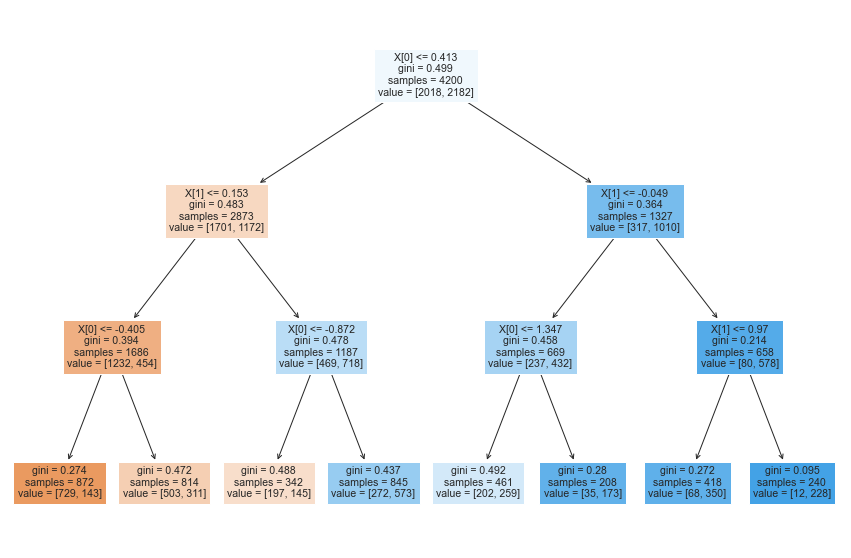

In [72]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [73]:
#prediction
y_pred=treemodel.predict(X_test)

In [74]:
y_pred

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [75]:
from sklearn.metrics import accuracy_score,classification_report

In [76]:
score=accuracy_score(y_pred,Y_test)
print(score)

0.7011111111111111


In [77]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69       847
           1       0.73      0.69      0.71       953

    accuracy                           0.70      1800
   macro avg       0.70      0.70      0.70      1800
weighted avg       0.70      0.70      0.70      1800



### TPOT Auto ML

### Iteration 1: Building TPOT classifier with raw data(not scaled) and without treating outliers

In [458]:
X=df.iloc[:,0:4]
X

,age,systolic_bp,diastolic_bp,cholesterol
0,77,85.288742,80.021878,79.957109
1,63,99.379736,84.852361,110.382411
2,69,111.349455,109.850616,100.828246
3,82,95.056128,79.666851,87.066303
4,78,109.154591,90.713220,92.511770
...,...,...,...,...
5995,49,94.857639,86.615671,107.643986
5996,63,100.039527,93.515186,104.971404
5997,55,98.421446,102.697875,120.875951
5998,63,106.809289,88.060631,106.052213


In [459]:
Y=df.iloc[:,4]
Y

0       1
1       1
2       1
3       1
4       1
       ..
5995    0
5996    1
5997    1
5998    1
5999    0
Name: prognosis, Length: 6000, dtype: int64

In [460]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=30, test_size=0.20)

In [463]:
from tpot import TPOTClassifier

     ---------------------------------------- 87.2/87.2 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 114.3/114.3 kB 6.9 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=e04cae78603a4ee404d31f305dab0f21a97df27baebafb1c9f274dda9da8834b
  Stored in directory: c:\users\parth\appdata\local\pip\cache\wheels\48\8c\93\3afb1916772591fe6bcc25cdf8b1c5bdc362f0ec8e2f0fd413
Successfully built stopit


In [464]:
tpot = TPOTClassifier(generations=5,population_size=50,verbosity=2)
tpot.fit(X_train, Y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7458333333333333

Generation 2 - Current best internal CV score: 0.7460416666666667

Generation 3 - Current best internal CV score: 0.7460416666666667

Generation 4 - Current best internal CV score: 0.746875

Generation 5 - Current best internal CV score: 0.7477083333333334

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.7000000000000001, min_samples_leaf=10, min_samples_split=8, n_estimators=100)


TPOTClassifier(generations=5, population_size=50, verbosity=2)

In [465]:
print("The Accuracy of Iteration 1 is: ",tpot.score(X_test, Y_test))

The Accuracy of Iteration 1 is:  0.765


### Iteration 2: Building TPOT classifier with raw data(not scaled) and with treating outliers by logarithamic transformation

In [7]:
df['age_log']=np.log(df['age'])
df['systolic_bp_log']=np.log(df['systolic_bp'])
df['diastolic_bp_log']=np.log(df['diastolic_bp'])
df['cholesterol_log']=np.log(df['cholesterol'])

In [8]:
x=df.iloc[:,5:9]
x

,prognosis,age_log,systolic_bp_log,diastolic_bp_log
0,retinopathy,4.346352,4.446042,4.382300
1,retinopathy,4.151510,4.598948,4.440913
2,retinopathy,4.234164,4.712673,4.699121
3,retinopathy,4.414472,4.554468,4.377854
4,retinopathy,4.361139,4.692765,4.507703
...,...,...,...,...
5995,no_retinopathy,3.904230,4.552377,4.461481
5996,retinopathy,4.144716,4.605565,4.538124
5997,retinopathy,4.017504,4.589259,4.631791
5998,retinopathy,4.150551,4.671045,4.478026


In [9]:
y=df.iloc[:,4:5]
y

,cholesterol
0,79.957109
1,110.382411
2,100.828246
3,87.066303
4,92.511770
...,...
5995,107.643986
5996,104.971404
5997,120.875951
5998,106.052213


In [469]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=30, test_size=0.20)

In [470]:
tpot = TPOTClassifier(generations=5,population_size=100,verbosity=2)
tpot.fit(x_train, y_train)

Optimization Progress:   0%|          | 0/600 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7472916666666667

Generation 2 - Current best internal CV score: 0.7472916666666667

Generation 3 - Current best internal CV score: 0.7472916666666667

Generation 4 - Current best internal CV score: 0.7472916666666667

Generation 5 - Current best internal CV score: 0.7472916666666667

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.9500000000000001, min_samples_leaf=18, min_samples_split=19, n_estimators=100)


TPOTClassifier(generations=5, verbosity=2)

In [471]:
print("The Accuracy of Iteration 2 is: ",tpot.score(x_test, y_test))

The Accuracy of Iteration 2 is:  0.7641666666666667


### Iteration 3: Building TPOT classifier with scaled data and without treating outliers

In [472]:
s_df=df.iloc[:,:4]
s_df.head()

,age,systolic_bp,diastolic_bp,cholesterol
0,77,85.288742,80.021878,79.957109
1,63,99.379736,84.852361,110.382411
2,69,111.349455,109.850616,100.828246
3,82,95.056128,79.666851,87.066303
4,78,109.154591,90.713220,92.511770


In [473]:
x1=scaled_df.iloc[:,:4]
x1

,Age,Systolic_bp,Diastolic_bp,Cholesterol
0,1.988753,-1.444088,-1.086684,-1.981315
1,0.354305,-0.123270,-0.585981,0.934929
2,1.054783,0.998712,2.005212,0.019169
3,2.572484,-0.528543,-1.123484,-1.299904
4,2.105499,0.792976,0.021526,-0.777959
...,...,...,...,...
5995,-1.280142,-0.547148,-0.403205,0.672453
5996,0.354305,-0.061424,0.311964,0.416288
5997,-0.579664,-0.213095,1.263795,1.940727
5998,0.354305,0.573139,-0.253428,0.519882


In [474]:
y1=scaled_df.iloc[:,-1]
y1

0       1
1       1
2       1
3       1
4       1
       ..
5995    0
5996    1
5997    1
5998    1
5999    0
Name: Prognosis, Length: 6000, dtype: int64

In [475]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(x1, y1, random_state=30, test_size=0.20)

In [476]:
tpot = TPOTClassifier(generations=5,population_size=50,verbosity=2)
tpot.fit(X1_train , Y1_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.745

Generation 2 - Current best internal CV score: 0.7466666666666667

Generation 3 - Current best internal CV score: 0.7466666666666667

Generation 4 - Current best internal CV score: 0.7474999999999999

Generation 5 - Current best internal CV score: 0.7508333333333334

Best pipeline: LinearSVC(MLPClassifier(input_matrix, alpha=0.0001, learning_rate_init=0.1), C=15.0, dual=True, loss=squared_hinge, penalty=l2, tol=0.0001)


TPOTClassifier(generations=5, population_size=50, verbosity=2)

In [477]:
print("The Accuracy of Iteration 3 is: ",tpot.score(X1_test, Y1_test))

The Accuracy of Iteration 3 is:  0.7666666666666667


### Iteration 4: Building TPOT classifier with scaled data and with treating outliers by Raciprocal

In [478]:
scaled_df['systolic_bp_reciprocal']=1/scaled_df.Systolic_bp
scaled_df['diastolic_bp_reciprocal']=1/scaled_df.Diastolic_bp
scaled_df['cholesterol_reciprocal']=1/scaled_df.Cholesterol
scaled_df['age_reciprocal']=1/scaled_df.Age

In [479]:
scaled_df.head()

,Age,Systolic_bp,Diastolic_bp,Cholesterol,Prognosis,systolic_bp_reciprocal,diastolic_bp_reciprocal,cholesterol_reciprocal,age_reciprocal
0,1.988753,-1.444088,-1.086684,-1.981315,1,-0.692478,-0.920231,-0.504715,0.502828
1,0.354305,-0.123270,-0.585981,0.934929,1,-8.112302,-1.706541,1.069600,2.822424
2,1.054783,0.998712,2.005212,0.019169,1,1.001290,0.498700,52.167741,0.948063
3,2.572484,-0.528543,-1.123484,-1.299904,1,-1.891994,-0.890088,-0.769288,0.388729
4,2.105499,0.792976,0.021526,-0.777959,1,1.261072,46.454634,-1.285414,0.474947


In [480]:
x2=scaled_df.iloc[:,5:9]
x2

,systolic_bp_reciprocal,diastolic_bp_reciprocal,cholesterol_reciprocal,age_reciprocal
0,-0.692478,-0.920231,-0.504715,0.502828
1,-8.112302,-1.706541,1.069600,2.822424
2,1.001290,0.498700,52.167741,0.948063
3,-1.891994,-0.890088,-0.769288,0.388729
4,1.261072,46.454634,-1.285414,0.474947
...,...,...,...,...
5995,-1.827659,-2.480130,1.487093,-0.781163
5996,-16.280264,3.205498,2.402185,2.822424
5997,-4.692747,0.791268,0.515271,-1.725136
5998,1.744777,-3.945901,1.923512,2.822424


In [481]:
y2=scaled_df.iloc[:,4:5]
y2

,Prognosis
0,1
1,1
2,1
3,1
4,1
...,...
5995,0
5996,1
5997,1
5998,1


In [482]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(x2, y2, random_state=30, test_size=0.20)

In [483]:
tpot = TPOTClassifier(generations=5,population_size=50,verbosity=2)
tpot.fit(X2_train , Y2_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7375

Generation 2 - Current best internal CV score: 0.73875

Generation 3 - Current best internal CV score: 0.739375

Generation 4 - Current best internal CV score: 0.7395833333333333

Generation 5 - Current best internal CV score: 0.7408333333333335

Best pipeline: RandomForestClassifier(MinMaxScaler(input_matrix), bootstrap=False, criterion=gini, max_features=0.1, min_samples_leaf=16, min_samples_split=7, n_estimators=100)


TPOTClassifier(generations=5, population_size=50, verbosity=2)

In [484]:
print("The Accuracy of Iteration 4 is: ",tpot.score(X2_test, Y2_test))

The Accuracy of Iteration 4 is:  0.745
